# Supplemental Figures: TIE Microscopy for Dynamic Microtubules
## Q. Tyrell Davis - 2017

### Figure S3: Offset Methods for Stabilizing  the 1D TIE in the Fourier Domain
* <strong>a</strong>) The quadratic (found in the Fourier domain TIE) demonstrates the instability of the TIE equation. As the spatial frequency goes to 0, the FD TIE will blow up. We can add a small global offset to the denominator to prevent division by 0, or as we see here we can add a small sinusoidal bump (a shifted Hanning function) to selectively offset the quadratic for low spatial frequencies. 
* <strong>b</strong>) The Fourier domain TIE demonstrates the effect of adding a Hanning bump (green) vs. a global offset (red). 
* <strong>c</strong>) Simulated signal + noise used in this figure. 
* <strong>d</strong>) Signal + noise recovered after convolution with <strong>b</strong>
* <strong>e</strong>) Recovered signal with simulated noise removed
To adjust width and amplitude of the Hanning bump, use the blue sliders at the bottom of the figure

### Figure S4: Exploring Offset Methods for Stabilizing TIE Solutions for a 2D Rod Phantom
Fourier domain Poisson solvers and recovered TIE micrographs for a simulated rod phantom.
* <strong>a</strong>) Fourier domain Poisson solver with a Hanning bump offset 
* <strong>b</strong>) Fourier domain Poisson solver with a global offset 
* <strong>c</strong>) Rod phantom phase map recovered with Hanning bump TIE solver
* <strong>d</strong>) Rod phantom phase map recovered with global offset TIE solver

Blue sliders can be used to adjust $w_0$ and offset amplitude. Although the signal-to-noise ratio is reported here according to the definition for MT micrographs described in [1], the optimized choice of parameters depends on one's objectives. Setting amplitude and $w_0$ aggressively can be used for high contrast images with MTs that are more easily recognizable to a human user or pattern-recognition software. If accurate optical path lengths are desired for quantitative analysis lesser offsets may be desirable. Furthermore, high amplitude and low $w_0$ Hanning bumps create an integrated Fourier band-pass filter in the TIE solver and should be minimized for quantitative images of larger phase objects such as cells


### Figure S5: Efffect of Parameter Choices on TIE Solutions for MT Micrographs
Fourier domain Poisson solvers and recovered TIE micrographs of microtubules.
* <strong>a</strong>) Fourier domain Poisson solver with a Hanning bump offset 
* <strong>b</strong>) Fourier domain Poisson solver with a global offset 
* <strong>c</strong>) Microtubules micrograph phase map recovered with Hanning bump TIE solver
* <strong>d</strong>) Microtubules micrograph phase map recovered with global offset TIE solver

The choice of parameters for the Hanning bump width and amplitude has effects the quality of the computed phase map. The left column displays the Fourier domain TIE solver filter and the resulting phase map, and the right column displays the Fourier domain solver using a global offset and the resulting phase map. This figure can be used to make decisions about when to use a global offset and when and what parameter settings to use with a Hanning bump.

To adjust width and amplitude of the Hanning bump, use the blue sliders at the bottom of the figure


In [23]:
# Import plotting essentials and necesary numpy/scipy
from matplotlib import pyplot as plt
import colormaps as cmaps
from scipy import misc
import numpy as np
# Sliders reference used: https://matplotlib.org/2.0.0/examples/widgets/slider_demo.html
from matplotlib.widgets import Slider, Button, RadioButtons

if (1):
    # If nbagg backend is set up it can be used for interactive inline figures
    %matplotlib nbagg

# Use viridis as the colormap
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
# Adjust DPI settings to taste
myDPI = 40

In [24]:
def TIEMMT(dI,px,hannScale,w0):
    # Estimate a solution to the transport of intensity equation and return
    # the resulting phase maps.
    # Inputs:
    # dI - First derivative of intensity with respect to defocus. Assuming this incorporates k0 and dz = (k0*dI)/dz
    # px - pixel size in microns (physical pixel size divided by magnification)
    # hannScale - scaling factor (amplitude) for Hanning bump
    # w0 - width of the Hanning bump
    # 
    # Returns:
    # Phase map and Fourier Domain TIE solvers with Hanning bump and global offset 
    # myTIEH, myTIEGO, phiHann, phiGo
    # Author: Q. Tyrell Davis 2017
    
    
    # Image dimensions
    Nx = len(dI[0,:])
    Ny = len(dI[:,0])
    
    X1 = np.arange(-Nx,Nx,1)
    Y1 = np.arange(-Ny,Ny,1)
    
    # set up the coordinates for the Fourier Domain
    myPadFactor = 2
    freqStepX = 2*np.pi / (Nx*myPadFactor)
    freqStepY = 2*np.pi / (Ny*myPadFactor)
    if (0):
        wX = np.arange(-np.pi,np.pi,freqStepX)
        wY = np.arange(-np.pi,np.pi,freqStepY)
    elif(0):
        wX = np.arange(-np.pi-freqStepX,np.pi-freqStepX,freqStepX)
        wY = np.arange(-np.pi-freqStepY,np.pi-freqStepY,freqStepY)
    elif(1):
        wX = np.arange(-np.pi+freqStepX,np.pi+freqStepX,freqStepX)
        wY = np.arange(-np.pi+freqStepY,np.pi+freqStepY,freqStepY)
    WX,WY = np.meshgrid(wX,wY) 
    wR = np.sqrt(WX**2+WY**2)
    
    ww = wR
    wR[wR >= np.pi/w0] = np.pi/(w0)
    # wR is used to define the Hanning Bump (set to make hBump value zero outside w0)
    # ww is used to calculate the TIE 
    

    if(0):
        freqStepX2 = 2*np.pi / (Nx)
        freqStepY2 = 2*np.pi / (Ny)
        wX2 = np.arange(-np.pi,np.pi,freqStepX2)
        wY2 = np.arange(-np.pi,np.pi,freqStepY2)
        WX2,WY2 = np.meshgrid(wX2,wY2)
        wR2 = np.sqrt(WX2**2+WY2**2)
        wR2[wR2 >= np.pi] = np.pi
        aPod = (1+np.cos(.5*wR2))
        if(1):
            hX = np.hamming(Nx)
            hY = np.hamming(Ny)
            aPod = np.sqrt(np.outer(hX,hX))
        if(1):
            plt.figure()
            plt.imshow(aPod,cmap=cmaps.viridis)
            plt.show()
    
    # define the Hanning window, used to stabilize the FD TIE
    # w0 defines how wide, hannScale defines the amplitude
    hann= (hannScale)*(1+np.cos(wR*np.pi/w0))
    dI = dI
    # Transform dI/dz to the Fourier Domain, use zero padding to 2X dimensions
    DI = np.fft.fftshift(np.fft.fft2(dI,[Ny*myPadFactor, Nx*myPadFactor]))

    # Compute the phase
    # Define the Laplacian FD transform pair w/ Hanning bump or global offset
    myTIEGO = (1/ ((4*np.pi**2)*(ww**2+hannScale)))
    myTIEH = (1/ ((4*np.pi**2)*(ww**2+hann)))
    
    # compute phase maps (all caps are FD)
    PHI = - DI * myTIEH
    PHINH = - DI * myTIEGO
    phiHann = np.real(np.fft.ifft2(np.fft.ifftshift(PHI)))
    phiGo = np.real(np.fft.ifft2(np.fft.ifftshift(PHINH)))
    
    # crop the phase image ()
    phiHann = phiHann[0:Ny,0:Nx]
    phiGo = phiGo[0:Ny,0:Nx]
    
    # adjust phase map result so that all values are positive
    if (1):
        phiHann = phiHann - np.min(phiHann)
        phiGo = phiGo -np.min(phiGo)
        
    return phiHann, phiGo, myTIEH, myTIEGO 

In [25]:
def TIEProp(myAmp,dz,k0,myPhi):
    # Compute a first derivative of intensity given an intensity, phase image, defocus distance, and wavenumber
    
    # Compute the TIE. 
    # For now ignoring pixel size
    myGradIx, myGradIy = np.gradient(myAmp)
    myGradI = myGradIx + myGradIy
    myGradPhix, myGradPhiy = np.gradient(myPhi)
    myGradPhi = myGradPhix+myGradPhiy
    myGradx, myGrady = np.gradient(myAmp*myGradPhi)
    myGrad = myGradx + myGrady
    
    #Add dI/dz
    newImg = myAmp+(dz/k0)*myGrad
    return newImg

In [26]:
# This function is used for labeling subplots
def getAxisLimits(ax, scale=.8):#,indxX=0,indxY=1):
    return ax.get_xlim()[0]*scale, ax.get_ylim()[1]*scale
# This function is used for labeling subplots in S4/S5

def getAxisLimitsS4(ax, scale=.8):#,indxX=0,indxY=1):
    return ax.get_xlim()[0]*scale+myDPI/3, ax.get_ylim()[1]*scale+myDPI*1.75


def getAxisLimitsS5(ax, scale=.8):#,indxX=0,indxY=1):
    return ax.get_xlim()[0]*scale+myDPI/3, ax.get_ylim()[1]*scale+myDPI*3.5

In [27]:
def updateFigS3(val):
    # Update HB parameters
    hanScale = samp1.val
    w0 = sfreq1.val
    
    # Calculate HB
    han = (hanScale/2)*(1-np.cos((np.pi*w/w0)-np.pi))
    for c in range(len(kx)):
        if np.abs(kx[c]) >= w0:
            han[c] = 0
    # Generate 1D Fourier domain TIE solver filters 
    phi2 = k0 / ((4*np.pi**2)*(kx**2+han))
    phi3 = k0 / ((4*np.pi**2)*(kx**2+hanScale))

    #Compute 1D "Phase" for Hanning bump and global offset
    myPhase1 = np.fft.ifft(mySN*(phi2))
    myNoise1 = np.fft.ifft(np.fft.fft(myNoise)*(phi2))
    myPhase2 = np.fft.ifft(mySN*(phi3))
    myNoise2 = np.fft.ifft(np.fft.fft(myNoise)*(phi3))
    
    # Clear figure axes (prevent legend entries and plots from piling up)
    myAxes[0,0].cla()
    myAxes[0,1].cla()
    myAxes[1,0].cla()
    myAxes[1,1].cla()
    myAxes[2,0].cla()
    myAxes[2,1].cla()
    
    # Plot the quadratic from the FD TIE denominator w/ and w/o Hanning bump offset
    myAxes[0,0].plot(kx,han,color=[0.75,0.35,0.15],lw=1.5,label='Hanning Window')
    myAxes[0,0].plot(kx,kx**2*4*np.pi**2,color=[0.75,0.70,0.55],lw=1.5,label='Unmodified Denominator')
    myAxes[0,0].plot(kx,han+kx**2*4*np.pi**2,c=[0.0,0.35,0.4],lw=1.5,label='Denominator + Hanning')
    myAxes[0,0].legend(loc=9,fontsize=fsz)
    myAxes[0,0].axis([-0.125+0*np.pi/4, 0.125+0*np.pi, 0, .5])
    myAxes[0,0].annotate('a',xy=getAxisLimits(myAxes[0,0]),fontsize=fsz*4)
       
    # plot the Fourier transform of a Laplacian ($F[\nabla**2]$)
    myAxes[0,1].plot(kx,phi1,color=[0.75,0.70,0.55],lw=1.5,label=r'$\mathcal{F}[ \nabla^2 ]$')
    myAxes[0,1].cla()
    myAxes[0,1].plot(kx,phi1,color=[0.75,0.70,0.55],lw=1.5,label=r'$\mathcal{F}[ \nabla^2 ]$')
    myAxes[0,1].plot(kx,phi2,c=[0.0,0.35,0.4],lw=1.5,label='w/ Hann')
    myAxes[0,1].plot(kx,phi3,c=[1.0,0.35,0.4],lw=1.5,label='w/ global offset')
    myAxes[0,1].axis([-np.pi/2, np.pi/2, 0, 34])
    myAxes[0,1].legend(loc=1,fontsize=fsz)
    myAxes[0,1].annotate('b',xy=getAxisLimits(myAxes[0,1],0.7),fontsize=fsz*4)
   
    # plot the simulated signal line plot plus noise
    myAxes[1,0].plot(mySignalNoise/np.mean(mySignalNoise),'k',lw=1.5,label='Signal+noise ')
    myAxes[1,0].legend(loc=1,fontsize=fsz)
    myAxes[1,0].axis([0, 512, 0, 7])
    myAxes[1,0].annotate('c',xy=[3,5],fontsize=fsz*4)
    
    # plot the inverse Fourier transform of the 1D signal+noise plot convolved with the FD Laplacian at a 
    # Subtract noise result from signal+noise result 
    mySig1 = np.abs(myPhase1)-np.abs(myNoise1)
    mySig2 = np.abs(myPhase2)-np.abs(myNoise2)
    myPk1 = np.max(mySig1)-np.min(mySig1)
    myPk2 = np.max(mySig2) - np.min(mySig2)
    std2 =  np.std(np.abs(myNoise2))
    std1 =  np.std(np.abs(myNoise1))
    # Plot
    myAxes[1,1].plot(np.abs(myPhase2),c=[0.75,0.70,0.55],lw=1.5,label='Cross section + Offset')
    myAxes[1,1].plot(np.abs(myPhase1),c=[0.0,0.35,0.4],lw=1.5,label='Cross Section + Hann')
    myAxes[1,1].legend(loc=1,fontsize=fsz)
    myAxes[1,1].annotate('d',xy=getAxisLimits(myAxes[1,1],0.7),fontsize=fsz*4)
    myAxes[2,1].plot([0,1],[1,1],'.',label='G.O. SNR = ' + str(myPk2/std2))
    myAxes[2,1].plot([0,1],[1,1],'.',label='Hann SNR = ' + str(myPk1/std1))
    myAxes[2,1].legend()
   
    # Display the noise free signal PSFs
    myAxes[2,0].plot(np.abs(myPhase2)-np.abs(myNoise2),c=[0.75,0.70,0.55],lw=1.5,label='Signal (Global Offset)')
    myAxes[2,0].plot(np.abs(myPhase1)-np.abs(myNoise1),c=[0.0,0.35,0.4],lw=1.5,label='Signal (Hanning)')
    myAxes[2,0].legend(loc=1,fontsize=fsz)
    myAxes[2,0].annotate('e',xy=getAxisLimits(myAxes[2,0],1.75),fontsize=fsz*4)    

    
    plt.show()

In [28]:
def updateTIEFigS4(val):
    # Update TIE phantom phase micrograph interactive figure.
    # Update the amplitude and width of the Hanning bump offset
    hannScale = samp2.val
    w0 = sfreq2.val
    
    # Get TIE phase map
    myPhiHann, myPhiGO, myPHI, myPHINH = TIEMMT(dI,px,hannScale,w0)
    if(0): # TIE for noise and signal separately
        myPhiHannN, myPhiGON, myPHIN, myPHINHN = TIEMMT(myNoiseDI,px,hannScale,w0)
        mySignalHann, mySignalGO, mySigN, mySigNH = TIEMMT(mySigDI,px,hannScale,w0)

    # Display the Fourier transforms of the TIE
    myAxesS4[0,0].imshow(np.log(np.abs((myPHI))),cmap=cmaps.viridis)
    myAxesS4[0,0].set_title("Phantom TIE w/ Hanning Bump",fontsize=fsz*1.5)
    myAxesS4[0,1].imshow(np.log(np.abs((myPHINH))),cmap=cmaps.viridis)
    myAxesS4[0,1].set_title("Phantom TIE w/ Global Offset",fontsize=fsz*1.5)
    # Display TIE micrographs
    myAxesS4[1,0].imshow((np.real((myPhiHann))),cmap='gray')
    myAxesS4[1,1].imshow((np.real((myPhiGO))),cmap='gray')
  
    #Compute SNRs according to [1]: (pk-pk amplitude divided by standard deviation)
    myWind = int(myPhantDim /2)
    myBoxSize = 10
    mySNRHann = np.max(myPhiHann[myWind-myBoxSize:myWind+myBoxSize,myWind-myBoxSize:myWind+myBoxSize])-np.min(myPhiHann[myWind-myBoxSize:myWind+myBoxSize,myWind-myBoxSize:myWind+myBoxSize]) / np.std(myPhiHann[myWind-2*myBoxSize:myWind+2*myBoxSize,myWind+2*myBoxSize:myWind+4*myBoxSize])
    mySNRGO = np.max(myPhiGO[myWind-myBoxSize:myWind+myBoxSize,myWind-myBoxSize:myWind+myBoxSize])-np.min(myPhiGO[myWind-myBoxSize:myWind+myBoxSize,myWind-myBoxSize:myWind+myBoxSize]) / np.std(myPhiGO[myWind-2*myBoxSize:myWind+2*myBoxSize,myWind+2*myBoxSize:myWind+4*myBoxSize])
    # Report SNRs
    myAxesS4[1,0].set_title("SNR with Hanning bump = " + str(mySNRHann),fontsize=fsz*1.5)
    myAxesS4[1,1].set_title("SNR with global offset = "  + str(mySNRGO),fontsize=fsz*1.5)
 
    #add subplot labels
    myAxesS4[0,0].annotate('a',xy=getAxisLimitsS4(myAxesS4[0,0],0.7),fontsize=fsz*4,color='white')
    myAxesS4[0,1].annotate('b',xy=getAxisLimitsS4(myAxesS4[1,0],0.7),fontsize=fsz*4,color='white')
    myAxesS4[1,0].annotate('c',xy=getAxisLimitsS4(myAxesS4[1,0],0.7),fontsize=fsz*4,color='white')
    myAxesS4[1,1].annotate('d',xy=getAxisLimitsS4(myAxesS4[1,1],0.7),fontsize=fsz*4,color='white')
    # Remove numbers from axes
    myAxesS4[0,0].set_yticklabels([])
    myAxesS4[0,0].set_xticklabels([])
    myAxesS4[1,0].set_yticklabels([])
    myAxesS4[1,0].set_xticklabels([])
    myAxesS4[0,1].set_yticklabels([])
    myAxesS4[0,1].set_xticklabels([])
    myAxesS4[1,1].set_yticklabels([])
    myAxesS4[1,1].set_xticklabels([])
 
    # Make room for sliders
    plt.subplots_adjust(bottom=0.2)
    plt.show()

In [29]:
def updateTIEFigS5(val):
    # Update TIE MT phase micrograph interactive figure.
    # Update the amplitude and width of the Hanning bump offset
    hannScale = samp2.val
    w0 = sfreq2.val
    
    # Get TIE phase map
    myPhiHann, myPhiGO, myPHI, myPHINH = TIEMMT(dI,px,hannScale,w0)

    # Display the Fourier transforms of the TIE
    myAxesS5[0,0].imshow(np.log(np.abs((myPHI))),cmap=cmaps.viridis)
    myAxesS5[0,0].set_title("TIEM w/ Hanning Bump",fontsize=fsz*1.5)
    myAxesS5[0,1].imshow(np.log(np.abs((myPHINH))),cmap=cmaps.viridis)
    myAxesS5[0,1].set_title("TIEM w/ Global Offset",fontsize=fsz*1.5)
    myAxesS5[1,0].imshow((np.real((myPhiHann))),cmap='gray')
    myAxesS5[1,1].imshow((np.real((myPhiGO))),cmap='gray')

    #add subplot labels
    myAxesS5[0,0].annotate('a',xy=getAxisLimitsS5(myAxesS5[0,0],0.7),fontsize=fsz*4,color='white')
    myAxesS5[0,1].annotate('b',xy=getAxisLimitsS5(myAxesS5[1,0],0.7),fontsize=fsz*4,color='white')
    myAxesS5[1,0].annotate('c',xy=getAxisLimitsS5(myAxesS5[1,0],0.7),fontsize=fsz*4,color='white')
    myAxesS5[1,1].annotate('d',xy=getAxisLimitsS5(myAxesS5[1,1],0.7),fontsize=fsz*4,color='white')
    
    # Remove numbers from axes
    myAxesS5[0,0].set_yticklabels([])
    myAxesS5[0,0].set_xticklabels([])
    myAxesS5[1,0].set_yticklabels([])
    myAxesS5[1,0].set_xticklabels([])
    myAxesS5[0,1].set_yticklabels([])
    myAxesS5[0,1].set_xticklabels([])
    myAxesS5[1,1].set_yticklabels([])
    myAxesS5[1,1].set_xticklabels([])
    
    # Make room for sliders
    plt.subplots_adjust(bottom=0.2)
    plt.show()

In [30]:
# Generate some 1D data for demonstrating the Hanning bump TIE

# Set up default values 

k0 = (2*np.pi)/0.530 
myC = 0.01
mySNR = 8
w0 = np.pi/31
hanScale = 1e-1

# set up 1D Fourier Domain TIE solver
kx = np.arange(-np.pi,np.pi,np.pi/256)
phi = k0 / (4*np.pi*(kx**2))
kx = np.arange(-np.pi,np.pi,np.pi/256)
w = np.arange(-np.pi,np.pi,np.pi/256)
han = (hanScale/2)*(1-np.cos((np.pi*w/w0)-np.pi))

for c in range(len(kx)):
    if np.abs(kx[c]) >= w0:
        han[c] = 0

# Generate some pseudo-noise        
np.random.seed(32)
myNoise = np.random.random(len(kx))

# Generate a Gaussian spike signal
myA = np.std(myNoise) * mySNR
mySignal = np.zeros(len(kx))
x = np.arange(-100,100,200/512)
mySignal = myA*np.exp(-(x)**2/(2*myC**2))

mySignalNoise = mySignal + myNoise
mySN = np.fft.fft(mySignalNoise)

phi1 = k0 / ((4*np.pi**2)*(kx**2+1e-12))
phi2 = k0 / ((4*np.pi**2)*(kx**2+han))
phi3 = k0 / ((4*np.pi**2)*(kx**2+hanScale))

# Multiply signal+noise with FD TIE solver

# w/ Hanning bump
myPhase1 = np.fft.ifft(mySN*(phi2))
myNoise1 = np.fft.ifft(np.fft.fft(myNoise)*np.fft.fftshift(phi2))
# w/ Global offset
myPhase2 = np.fft.ifft(mySN*(phi3))
myNoise2 = np.fft.ifft(np.fft.fft(myNoise)*np.fft.fftshift(phi3))


<IPython.core.display.Javascript object>


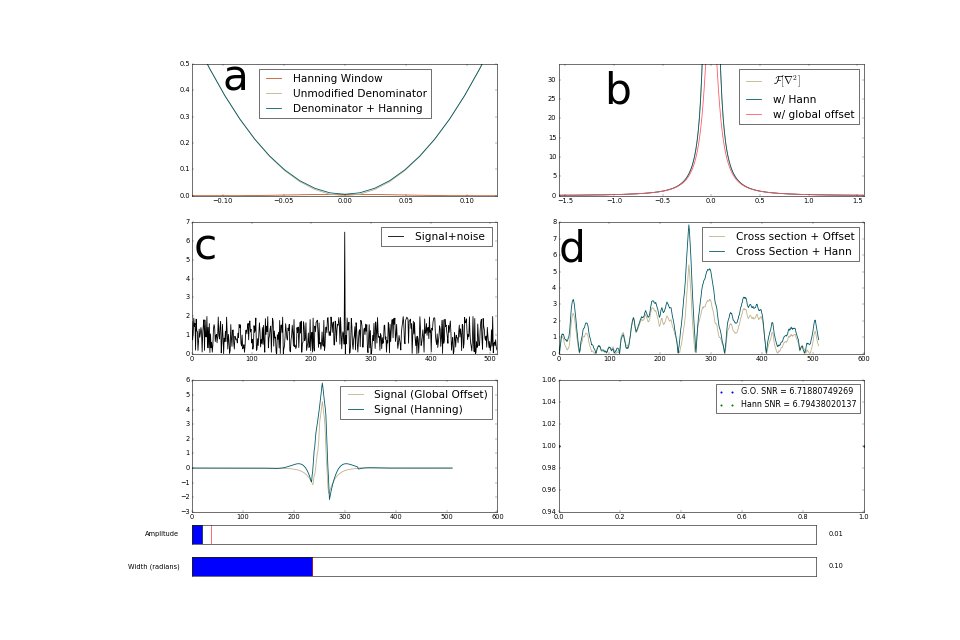

In [31]:
# Generate Figure S3
myFig, myAxes = plt.subplots(3,2, figsize=(24,16),dpi=myDPI)

# Default values for 1D TIE
w0 = 1e-1
hanScale = 1e-2
#font size
fsz = 19

plt.subplots_adjust(left=0.2, bottom=0.2)

axfreq = plt.axes([0.2, 0.1, 0.65, 0.03])#, facecolor=axcolor)
axamp = plt.axes([0.2, 0.15, 0.65, 0.03])

sfreq1 = Slider(axfreq, 'Width (radians)', 5e-3, 0.5, valinit = w0)
samp1 = Slider(axamp, 'Amplitude', 0.00001, 0.33, valinit = hanScale)

sfreq1.on_changed(updateFigS3)
samp1.on_changed(updateFigS3)

# Display Figure S1
updateFigS3(1)
plt.show()

<IPython.core.display.Javascript object>


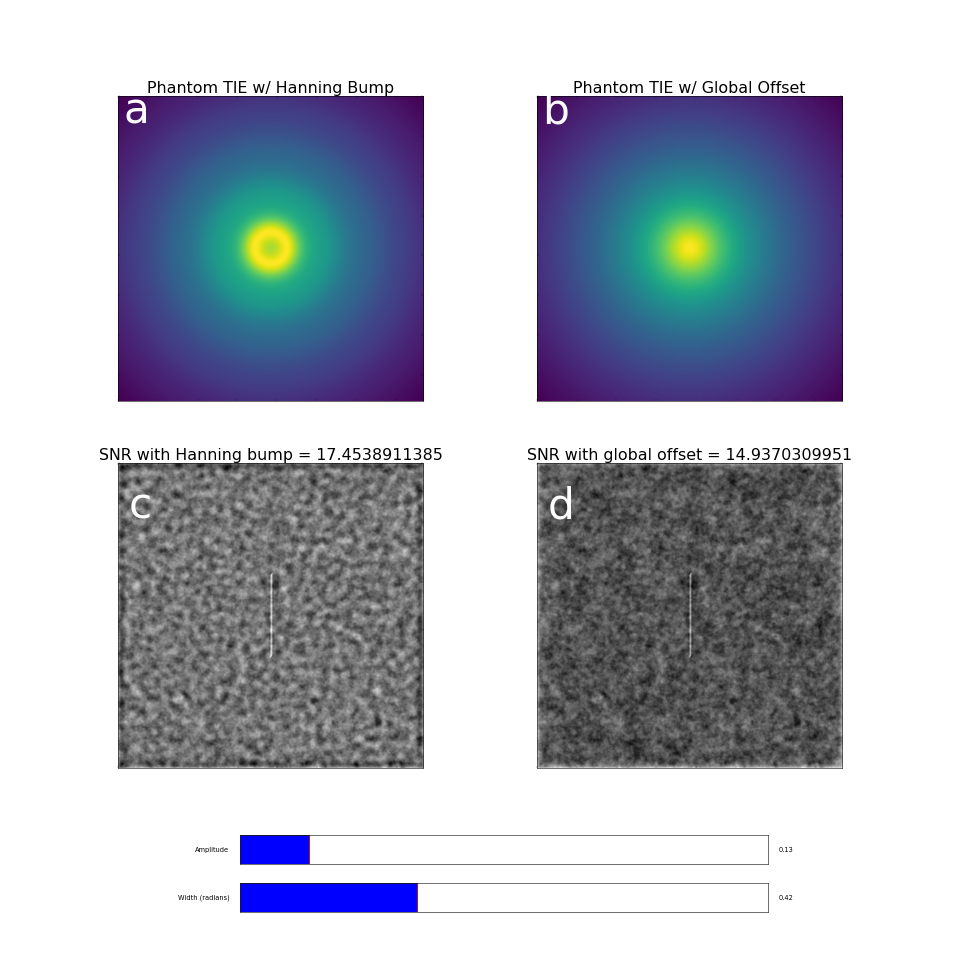

In [32]:
# Create a microtubule phantom for playing around with Hanning bump characteristics

myLambda = 0.530
px = 0.0375000
dz = 0.600
k0 = 2*np.pi/myLambda
nf = 1e1

hannScale = 1.3e-1
w0 = 4.2e-1 #np.sqrt(1/2) 

myPhantDim = 384
myPhantPhi = np.zeros([myPhantDim,myPhantDim])
myPhantPhi[(int(myPhantDim/2)-52):(int(myPhantDim/2)+52),int(myPhantDim/2)] = 1.8
myPhantImage = np.ones([myPhantDim,myPhantDim])
myPhantNoise1 = np.random.random(np.shape(myPhantImage))
myPhantNoise2 = np.random.random(np.shape(myPhantImage))
myPhantImage = myPhantImage * np.mean(myPhantNoise1)


myNewImgA = TIEProp(myPhantImage,1e3*dz/2,k0,myPhantPhi) 
myNewImgA = myNewImgA - np.min(myNewImgA)
myNewImgB = TIEProp(myPhantImage,-1e3*dz/2,k0,myPhantPhi) 
myNewImgB = myNewImgB - np.min(myNewImgB)


myNewImgAN = myNewImgA +nf*myPhantNoise1
myNewImgBN = myNewImgB + nf*myPhantNoise2

myPhantDI = k0*(myNewImgAN - myNewImgBN) / (dz)
mySigDI = k0*(myNewImgA - myNewImgB) / (dz)
myNoiseDI = k0*(myPhantNoise2 - myPhantNoise1) / (dz)
dI = myPhantDI


myFigS4, myAxesS4 = plt.subplots(2,2, figsize=(24,24), dpi=myDPI)
 
# Set up the sliders for adjusting TIE parameters
axfreq = plt.axes([0.25, 0.05, 0.55, 0.03])#, facecolor=axcolor)
axamp = plt.axes([0.25, 0.1, 0.55, 0.03])
sfreq2 = Slider(axfreq, 'Width (radians)', 0.001, 1.25, valinit=w0)
samp2 = Slider(axamp, 'Amplitude',0.00001, .99, valinit = hannScale)
#room for sliders
plt.subplots_adjust(left=0.1, bottom=-8.50)

sfreq2.on_changed(updateTIEFigS4)
samp2.on_changed(updateTIEFigS4)
# Display Figure S2
updateTIEFigS4(1)
#plt.show()

<IPython.core.display.Javascript object>


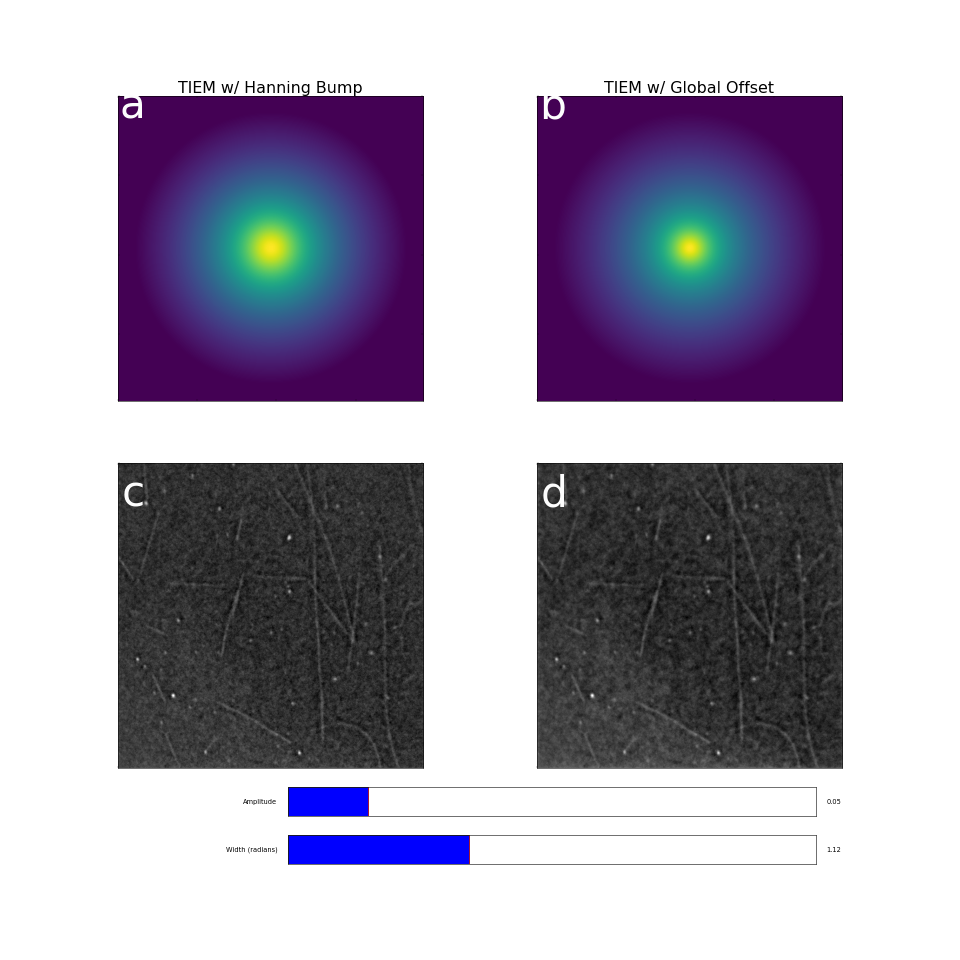

In [33]:
#Generate Fig. S5 Impact of Parameter Choices on TIE Phase Micrograph of MTs
myFigS5, myAxesS5 = plt.subplots(2,2, figsize=(24,24), dpi=myDPI)

# Set up initial parameters
myLambda = 0.530
px = 0.0375000
hannScale = 5e-2
w0 = 1.12 #np.sqrt(1/2) 

# Load sample images
if(0):
    Ia = 1.0*(misc.imread('Ia1.tif'))[0:964,0:964]
    Ib = 1.0*(misc.imread('Ib1.tif'))[0:964,0:964]
    dz = 0.045*8
elif(1):
    Ia = 1.0*(misc.imread('Ia2.tif'))[0:964,0:964]
    Ib = 1.0*(misc.imread('Ib2.tif'))[0:964,0:964]
    dz = 0.045*8
elif(1):
    Ia = 1.0*(misc.imread('Ia3.tif'))[0:964,0:964]
    Ib = 1.0*(misc.imread('Ib3.tif'))[0:964,0:964]
    dz = 0.045*8
elif(1):
    Ia = 1.0*(misc.imread('Ia4.tif'))[0:964,0:964]
    Ib = 1.0*(misc.imread('Ib4.tif'))[0:964,0:964]
    dz = 0.045*8

# Calculate first derivative of intensity with respect to defocus
dI = k0 * (Ia-Ib)/(dz)

# Set up the sliders for adjusting TIE parameters
plt.subplots_adjust(left=0.1, bottom=0.2)  
axfreq = plt.axes([0.3, 0.1, 0.55, 0.03])#, facecolor=axcolor)
axamp = plt.axes([0.3, 0.15, 0.55, 0.03])
sfreq2 = Slider(axfreq, 'Width (radians)', np.pi/50, np.pi, valinit=w0)
samp2 = Slider(axamp, 'Amplitude',0.00001, .33, valinit = hannScale)
# Sliders call update function when changed
sfreq2.on_changed(updateTIEFigS5)
samp2.on_changed(updateTIEFigS5)
#
# Call initial update to populate figure S5
updateTIEFigS5(1)


<strong>Supplementary References</strong>
1. Bormuth, V., Howard, J. & Schäffer, E. LED illumination for video-enhanced DIC imaging of single microtubules. J. Microsc. 226, 1–5 (2007).